# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Investment and Trading Capstone Project Proposa

Building a stock price predictor that takes daily trading data over a certain date range as input, and outputs projected estimates for given query dates. By looking at the historical data of a given stock as an input, the stock predictor application will train the model to predict the Adjusted Close value for the given stock in the future. The model will be created using regression algorithms as we are trying to predict the stock price.  Having such a software system will help people like me to make more educated decisions managing their stock portfolio.

The data is extracted from Yahoo fiance API using the following URL: http://finance.yahoo.com/q/hp?s=GOOG&a=01&b=19&c=2010&d=01&e=19&f=2010&g=d.

The datasets are stored in the datasets folder. The folder contain the following stocks symbols:

* GOOG - Google
* AAPL - Apple
* AMZN - Amazon
* MSFT - Microsoft

## Exploring the Data

In [16]:
# Import libraries
import pandas as pd
import numpy as np

def get_file_name(stock):
    #Method to read file from datasets folder
    return 'datasets/{}.csv'.format(stock)

# Any stock from ['GOOG', 'AAPL', 'AMZN', 'MSFT']
stock = 'GOOG'
# Read GOOG data, using date as the index column for the dataset
dataset = pd.read_csv(get_file_name(stock), parse_dates = True, index_col = 'Date')
print dataset.head()
print "Data read successfully!"


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-22  305.574646  305.758942  296.887207  599.155029  299.278229   
2012-05-23  299.701630  303.661804  297.445099  607.791382  303.592072   
2012-05-24  303.442627  304.817474  298.316833  602.007202  300.702881   
2012-05-25  299.377869  299.741486  293.041595  589.910461  294.660553   
2012-05-29  296.792542  298.446350  293.061523  592.712769  296.060303   

             Volume  
Date                 
2012-05-22  6126600  
2012-05-23  6379900  
2012-05-24  3796600  
2012-05-25  7190500  
2012-05-29  5230900  
Data read successfully!


## Implementation: Data Exploration

In [17]:
# Calculate number of entries in the historical data
number_of_entries = dataset.shape[0]

# Calculate number of features
number_of_features = len(dataset.columns) 

# Calculate the minimun Adj Close price
min_adj_price = dataset['Adj Close'].min()

# Calculate the minimun Adj Close price
max_adj_price = dataset['Adj Close'].max()

# Calculate the minimun Adj Close price
mean_adj_price = dataset['Adj Close'].mean()

# Print the results
print "Total number of Entries: {}".format(number_of_entries)
print "Number of features: {}".format(number_of_features)
print "Minimun Adj Close price: {}".format(min_adj_price)
print "Max Adj Close price: {}".format(max_adj_price)
print "Mean Adj Close price : {}".format(mean_adj_price)

Total number of Entries: 1258
Number of features: 6
Minimun Adj Close price: 278.481171
Max Adj Close price: 943.0
Mean Adj Close price : 574.876405461


## Preparing the Data

## Identify feature and target columns

The code below will identify the features and separate the target column from the dataset, at the end it will create:

* X_all - the dataset cotaininng only the feature columns.
* y_all - the target column.

In [18]:
#The target variable
y_all = dataset['Adj Close']

#Dropping the target variable from the main dataset.
X_all = dataset.drop(['Adj Close'], axis = 1)

# Extract feature columns
features = list(X_all.columns)
    
print features
print "\nTarget column:\n {}".format(y_all.head())
print "\nDataset column:\n {}".format(X_all.head())

['Open', 'High', 'Low', 'Close', 'Volume']

Target column:
 Date
2012-05-22    299.278229
2012-05-23    303.592072
2012-05-24    300.702881
2012-05-25    294.660553
2012-05-29    296.060303
Name: Adj Close, dtype: float64

Dataset column:
                   Open        High         Low       Close   Volume
Date                                                               
2012-05-22  305.574646  305.758942  296.887207  599.155029  6126600
2012-05-23  299.701630  303.661804  297.445099  607.791382  6379900
2012-05-24  303.442627  304.817474  298.316833  602.007202  3796600
2012-05-25  299.377869  299.741486  293.041595  589.910461  7190500
2012-05-29  296.792542  298.446350  293.061523  592.712769  5230900


## Implementation: Training and Testing Data Split

The implementation requires that the dataset to be splitted the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.
For the code cell below, does the following:

* Splits the data into 80% training and 20% testing.
* Sets the random_state for train_test_split to a value of your choicet to ensure the results to be consistent.
* Assigs the train and testing splits to X_train, X_test, y_train, and y_test.

In [19]:
from sklearn.model_selection import train_test_split

testSize = 0.20
randomState = 42

def split_data(X, y):
    print "********************Splitting the Data******************"
    print 'Shape of dataset: {}'.format(X.shape)
    print 'Shape of target: {}'.format(y.shape)
    return train_test_split(X, y, test_size=testSize, random_state=randomState)

X_train, X_test, y_train, y_test = split_data(X_all, y_all)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

********************Splitting the Data******************
Shape of dataset: (1258, 5)
Shape of target: (1258,)
Training set has 1006 samples.
Testing set has 252 samples.


## Data Preprocessing

To get a better understanding of the dataset, we can construct a scatter matrix of each of the features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data.

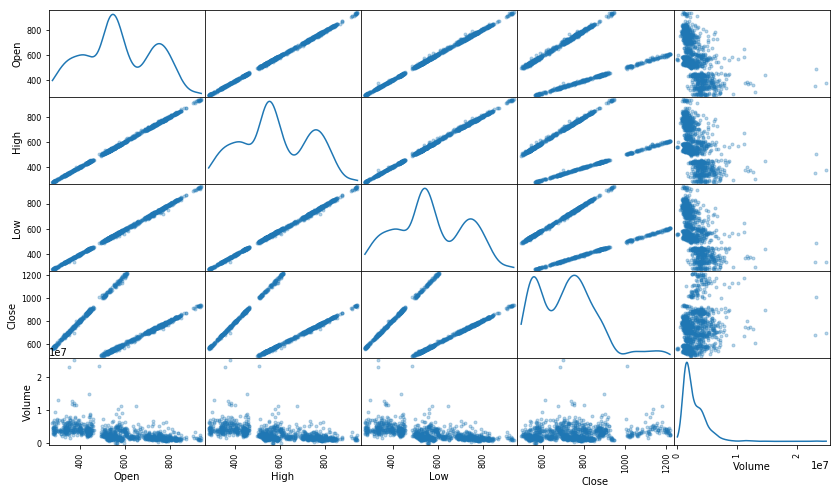

In [10]:
import matplotlib.pyplot as plt

pd.scatter_matrix(X_all, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.show()

## Implementation: Feature Scaling

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.
In the code block below, you will need to implement the following:
Assign a copy of the data to log_data after applying logarithmic scaling. Use the np.log function for this.
Assign a copy of the sample data to log_samples after applying logarithmic scaling. Again, use np.log.

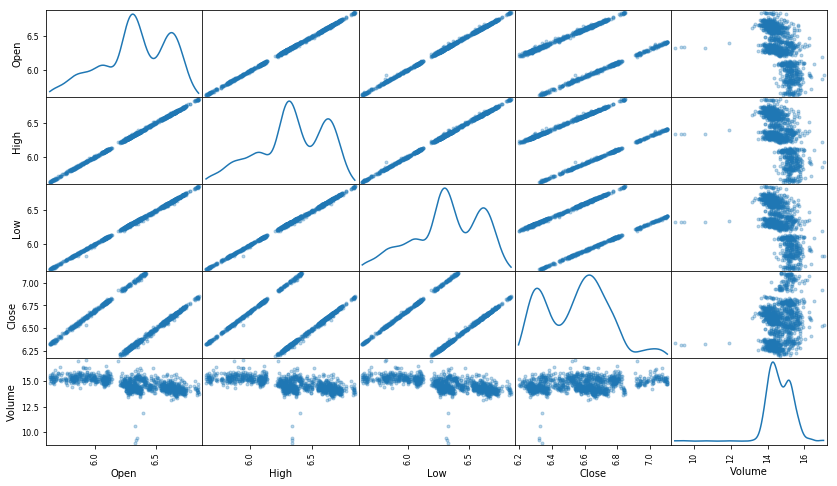

In [13]:
log_data = np.log(X_all)
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.show()

## Implementation: Define a Performance Metric


It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

In [22]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

score = performance_metric([650, 945, 740, 630], [660, 930, 750, 620])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.992.


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the:
**Linear Regression algorithm** and **Lasso**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the parametera for each algorithm. 

In [49]:
# TImport 'GridSearchCV', make_scorer and ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from time import time

def fit_model(X, y, regressor, params):
    """ Performs grid search for a regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
              #ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(regressor.__class__.__name__, len(X))

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'fit_intercept': (True, False), 'normalize':(True, False)}

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Creates the grid search object
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    start = time()
    grid = grid.fit(X, y)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


## Implementation: Model Performance Metrics

With the predefined function above, now we'll import the two supervised learning models and run the fit_model function for each one.


In [50]:
#Import 'make_scorer', 'LinearRegression'
from sklearn.linear_model import LinearRegression, Lasso

#Fit the training data to the model using grid search using LinearRegression
reg = fit_model(X_train, y_train, LinearRegression(), {'fit_intercept': (True, False), 'normalize':(True, False)})
print "Parameters for the optimal model: {}".format(reg.get_params())
print "Score: {}".format(reg.score(X_test, y_test))
print "------------------------------------------------------------------------"
# Fit the training data to the model using grid search using Lasso
reg = fit_model(X_train, y_train, Lasso(), {'alpha': [0.1], 'max_iter':(1000,10000)})
print "Parameters for the optimal model: {}".format(reg.get_params())
print "Score: {}".format(reg.score(X_test, y_test))

Training a LinearRegression using a training set size of 1006. . .
Trained model in 10.1533 seconds
Parameters for the optimal model: {'copy_X': True, 'normalize': True, 'n_jobs': 1, 'fit_intercept': False}
Score: 0.999719604742
------------------------------------------------------------------------
Training a Lasso using a training set size of 1006. . .
Trained model in 0.5733 seconds
Parameters for the optimal model: {'normalize': False, 'warm_start': False, 'selection': 'cyclic', 'fit_intercept': True, 'positive': False, 'max_iter': 10000, 'precompute': False, 'random_state': None, 'tol': 0.0001, 'copy_X': True, 'alpha': 0.1}
Score: 0.999711366962
